Loading pre-processed data from: ../data/filtered_complaints.csv
Dataset loaded with shape: (5000, 3)

--- First 5 Rows of the Cleaned Data ---
shape: (5, 3)
┌──────────────┬─────────────────────────────────┬─────────────────────────────────┐
│ Complaint ID ┆ Product                         ┆ cleaned_narrative               │
│ ---          ┆ ---                             ┆ ---                             │
│ i64          ┆ str                             ┆ str                             │
╞══════════════╪═════════════════════════════════╪═════════════════════════════════╡
│ 5324626      ┆ Credit reporting, credit repai… ┆ as i reviewed my recent report… │
│ 3483754      ┆ Credit card or prepaid card     ┆ on 2019, citibank closed all 3… │
│ 6230665      ┆ Credit reporting, credit repai… ┆ i have contacted on several oc… │
│ 5947639      ┆ Credit reporting, credit repai… ┆ there are late payments on my … │
│ 8751905      ┆ Checking or savings account     ┆ dealing with an error of c

/tmp/ipykernel_68265/3482482603.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Product', data=product_counts_pd, palette='viridis')


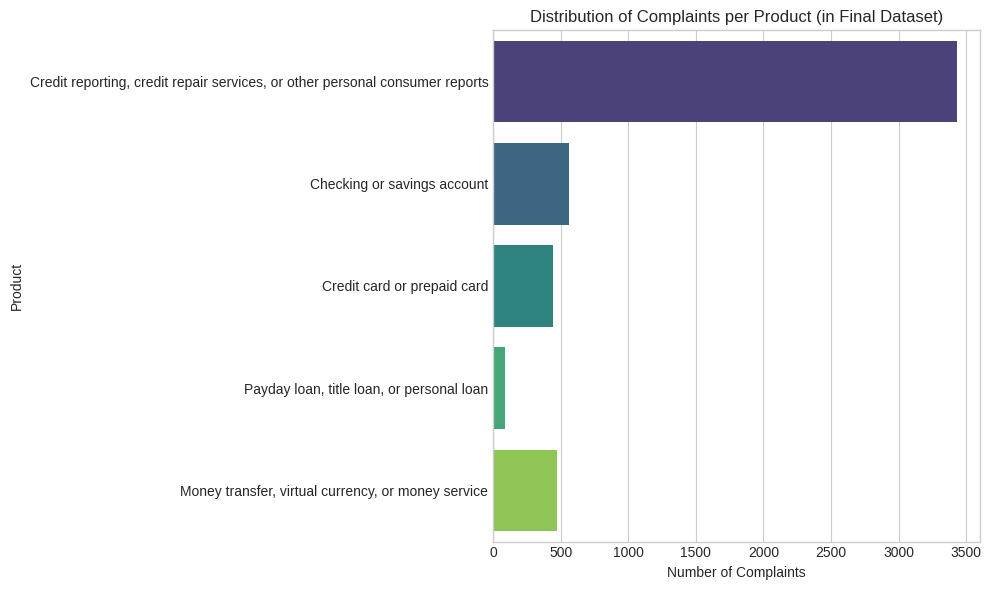

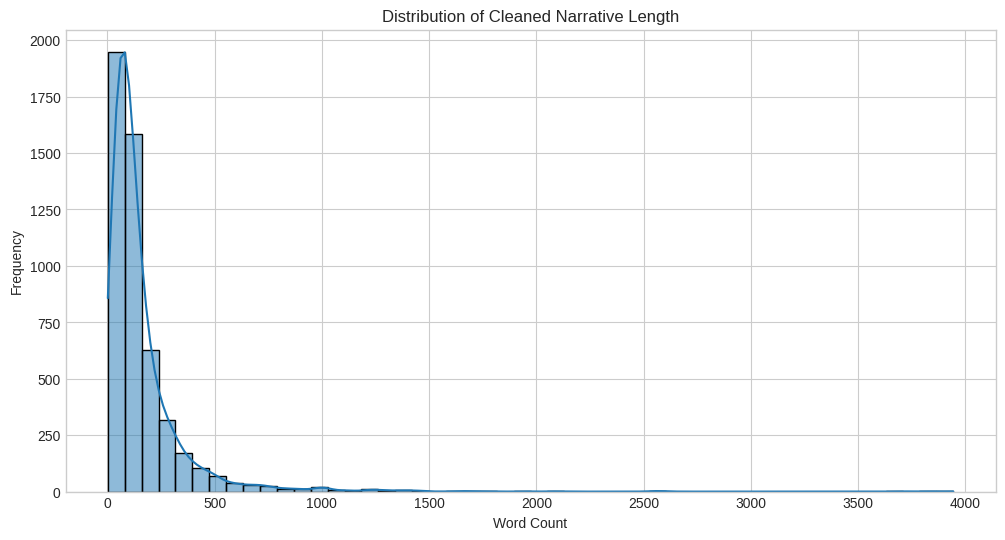


Descriptive Statistics for Narrative Length:
count    5000.000000
mean      158.515200
std       209.311707
min         2.000000
25%        57.000000
50%       100.000000
75%       180.000000
max      3943.000000
Name: word_count, dtype: float64


"\n### Summary of EDA and Preprocessing\n\nThe initial raw dataset, containing over 4 million complaints, was too large for direct in-memory analysis. Therefore, a batch-processing script using the Polars library was implemented to efficiently filter and clean the data. This script processed the raw data in chunks, filtering for five target product categories and ensuring that each record contained a customer narrative. This resulted in a focused dataset of over 1.1 million relevant complaints.\n\nFrom this filtered set, a random sample of 5,000 complaints was taken to create the final dataset for our RAG system. Analysis of this final dataset shows a distribution of complaints across the key product areas, with 'Credit reporting...' still being the most frequent category.\n\nThe length of the cleaned narratives was also analyzed. The distribution is right-skewed, with most complaints being under 400 words but with a significant number of longer, more detailed accounts. This confirms t

In [1]:
# In a Jupyter Notebook cell

import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')

# --- Step 1: Load the PRE-PROCESSED Data ---
# We are now loading the small, clean file created by our script.
# Memory is no longer an issue, so we can use pl.read_csv() directly.
FILTERED_DATA_PATH = '../data/filtered_complaints.csv'

if not os.path.exists(FILTERED_DATA_PATH):
    print(f"ERROR: The file '{FILTERED_DATA_PATH}' was not found.")
    print("Please run 'python src/preprocess_data.py' from your terminal first.")
else:
    print(f"Loading pre-processed data from: {FILTERED_DATA_PATH}")
    df = pl.read_csv(FILTERED_DATA_PATH)
    print(f"Dataset loaded with shape: {df.shape}")
    print("\n--- First 5 Rows of the Cleaned Data ---")
    print(df.head())


# --- Step 2: Analyze 'Product' Distribution on the Cleaned Data ---
# This plot now shows the distribution within our sampled, relevant data.
if 'df' in locals():
    product_counts_pl = df['Product'].value_counts()
    product_counts_pd = product_counts_pl.to_pandas()

    print("\nColumns in the product_counts DataFrame:", product_counts_pd.columns)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='Product', data=product_counts_pd, palette='viridis')
    plt.title('Distribution of Complaints per Product (in Final Dataset)')
    plt.xlabel('Number of Complaints')
    plt.ylabel('Product')
    plt.tight_layout()
    plt.show()


# --- Step 3: Analyze Narrative Length on the Cleaned Data ---
# We use the 'cleaned_narrative' column from our pre-processed file.
if 'df' in locals():
    word_count_pd = df.with_columns(
        pl.col("cleaned_narrative").str.split(by=" ").list.len().alias("word_count")
    )['word_count'].to_pandas()

    plt.figure(figsize=(12, 6))
    sns.histplot(word_count_pd, bins=50, kde=True)
    plt.title('Distribution of Cleaned Narrative Length')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()

    # Get descriptive statistics
    print("\nDescriptive Statistics for Narrative Length:")
    print(word_count_pd.describe())


# --- Step 4: Summary for Report ---
# In a markdown cell, you would write your 2-3 paragraph summary here based on these findings.
# Your summary can now also mention the preprocessing step itself. For example:

"""
### Summary of EDA and Preprocessing

The initial raw dataset, containing over 4 million complaints, was too large for direct in-memory analysis. Therefore, a batch-processing script using the Polars library was implemented to efficiently filter and clean the data. This script processed the raw data in chunks, filtering for five target product categories and ensuring that each record contained a customer narrative. This resulted in a focused dataset of over 1.1 million relevant complaints.

From this filtered set, a random sample of 5,000 complaints was taken to create the final dataset for our RAG system. Analysis of this final dataset shows a distribution of complaints across the key product areas, with 'Credit reporting...' still being the most frequent category.

The length of the cleaned narratives was also analyzed. The distribution is right-skewed, with most complaints being under 400 words but with a significant number of longer, more detailed accounts. This confirms the necessity of the text chunking strategy to be implemented in the next stage (Task 2), ensuring that our vector search can retrieve specific, contextually relevant information from both short and long complaints.
"""